### **Exercise: Outlier Detection and Removal in Student Test Scores**

### Problem Statement

* Your task is to analyze a dataset of student test scores. 

* As a data analyst, you need to identify and handle any potential outliers in the `test_score` column. 

* These outliers could represent exceptional student performance or, conversely, a lack of participation or a major misunderstanding of the test material. 

### Necessary Steps

1.  *Import Libraries and Load Dataset*: Load the provided `student_test_scores.csv` file into a pandas DataFrame.
2.  *Visualize the Data*: Use visualization tools like a box plot and a histogram to inspect the distribution of the test scores and identify any outliers.
3.  *Detect Outliers using Quantiles*: Programmatically detect outliers by defining upper and lower thresholds based on percentiles.
4.  *Remove Outliers*: Create a new DataFrame that removes the identified outliers.
5.  *Compare Original and Cleaned Data*: Compare the descriptive statistics and visualizations of the original and cleaned datasets to understand the impact of your work.

---

### Step 1: Import Libraries and Load Dataset

* First, import all the necessary libraries and load the student test scores dataset into a pandas DataFrame. 

*  We'll inspect the data's shape and a few descriptive statistics to get an initial understanding.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset and display the first few rows
df = pd.read_csv('student_test_scores.csv')
df.head()

,student_id,test_score
0,S_1,89.967142
1,S_2,83.617357
2,S_3,91.476885
3,S_4,100.000000
4,S_5,82.658466


In [3]:
# Display summary statistics of the test scores
df['test_score'].describe()

count    100.000000
mean      83.366449
std       14.453688
min        8.000000
25%       78.874401
50%       84.061708
75%       90.598391
max      115.000000
Name: test_score, dtype: float64

### Step 2: Visualize the Data to Identify Outliers

* Before we apply any numerical methods, we'll use visualization to see if there are any data points that stand out. 

* A box plot is ideal for this task as it shows the data's quartiles and flags potential outliers as individual points.

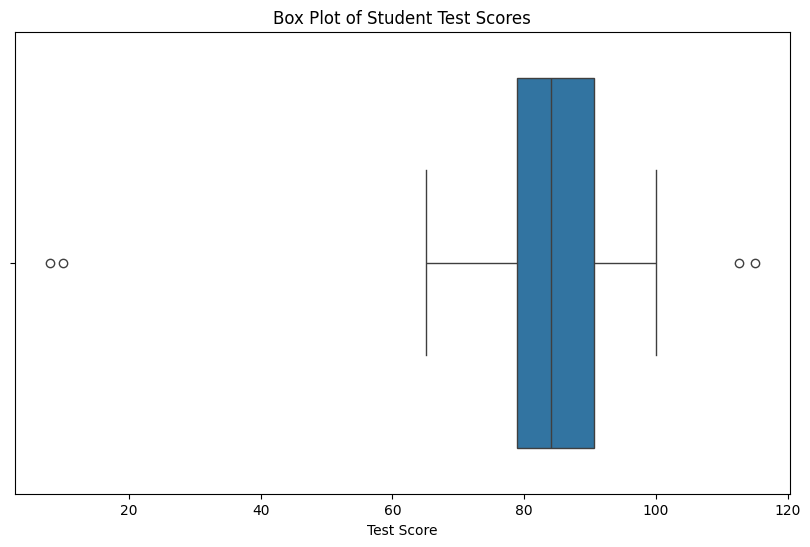

In [4]:
# Create a box plot of the test scores
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['test_score'])
plt.title('Box Plot of Student Test Scores')
plt.xlabel('Test Score')
plt.show()

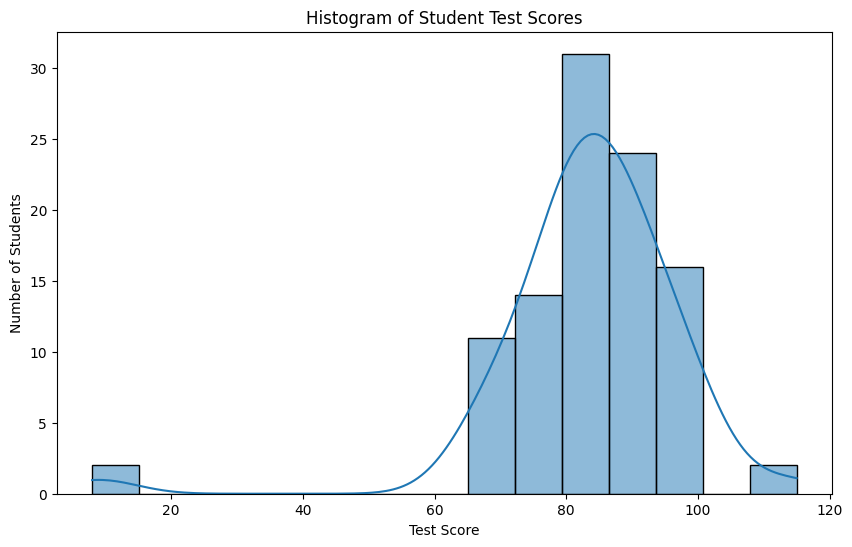

In [5]:
# Create a histogram for a different view of the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['test_score'], bins=15, kde=True)
plt.title('Histogram of Student Test Scores')
plt.xlabel('Test Score')
plt.ylabel('Number of Students')
plt.show()

### Step 3: Detect Outliers using Quantiles

* Now we will use a statistical method to identify the outliers. 

* We'll set a lower and upper threshold based on percentiles. 

* Data points outside this range will be considered outliers. 

* Our choice is to use the 2nd and 98th percentiles.

In [6]:
# Calculate the 1st and 99th percentiles and print them
lower_threshold = df['test_score'].quantile(0.02)
upper_threshold = df['test_score'].quantile(0.98)

lower_threshold, upper_threshold


(np.float64(64.02182463691125), np.float64(100.25221105443593))

In [7]:
print(f"Lower threshold (2nd percentile): {lower_threshold:.2f}")
print(f"Upper threshold (98th percentile): {upper_threshold:.2f}")

Lower threshold (2nd percentile): 64.02
Upper threshold (98th percentile): 100.25


In [8]:
# Display the data points that are considered outliers
outliers = df[(df['test_score'] < lower_threshold) | (df['test_score'] > upper_threshold)]
outliers.sort_values(by='test_score')

,student_id,test_score
25,S_26,8.000000
5,S_6,10.000000
97,S_98,112.610553
35,S_36,115.000000


### Step 4: Remove Outliers

* Once the outliers are identified, we'll create a new, cleaned DataFrame by filtering out the data points that fall outside our defined thresholds. 

* We will then check the new shape of the DataFrame.

In [9]:
# Create a new DataFrame without outliers
df_cleaned = df[(df['test_score'] >= lower_threshold) & (df['test_score'] <= upper_threshold)]

df.shape, df_cleaned.shape

((100, 2), (96, 2))

In [10]:
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)

Original DataFrame shape: (100, 2)
Cleaned DataFrame shape: (96, 2)


### Step 5: Compare Original and Cleaned Data

* Finally, let's compare the descriptive statistics and box plots of the original and cleaned datasets to clearly see the effect of removing the outliers.

In [11]:
# Display summary statistics of the Original test scores
df['test_score'].describe()

count    100.000000
mean      83.366449
std       14.453688
min        8.000000
25%       78.874401
50%       84.061708
75%       90.598391
max      115.000000
Name: test_score, dtype: float64

In [12]:
# Display summary statistics of the Cleaned test scores
df_cleaned['test_score'].describe()

count     96.000000
mean      84.281608
std        8.992957
min       65.124311
25%       78.990943
50%       84.061708
75%       90.205906
max      100.000000
Name: test_score, dtype: float64

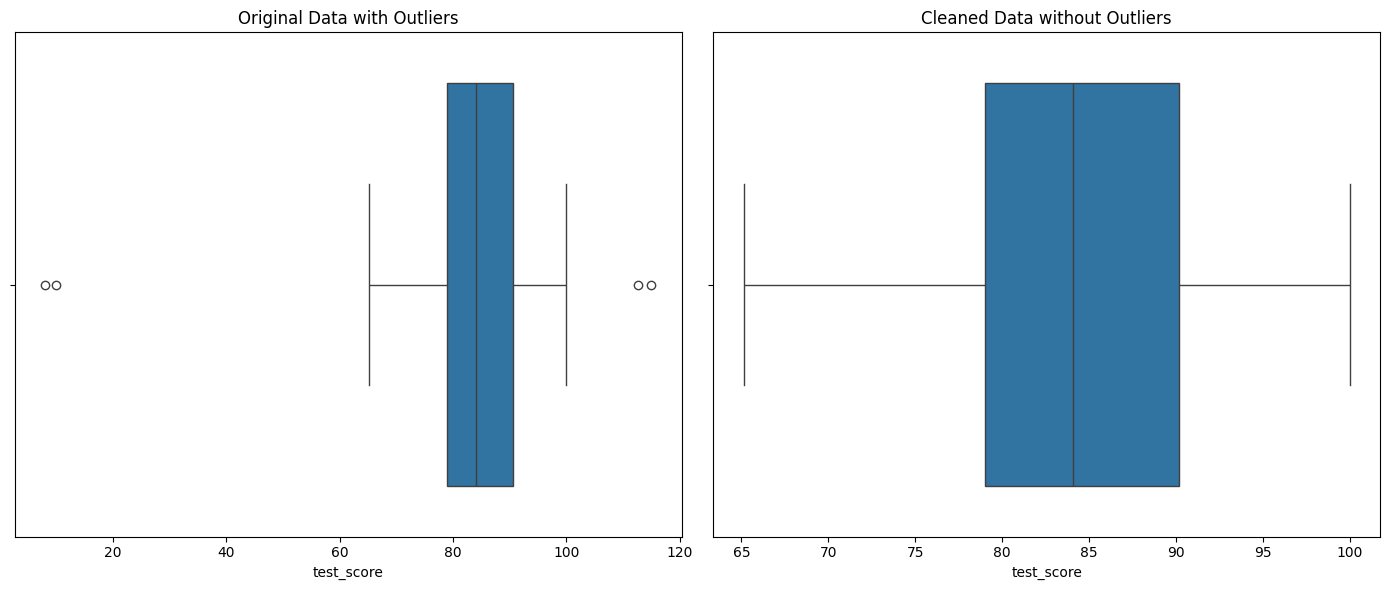

In [13]:
# Plot side-by-side box plots for comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.boxplot(x=df['test_score'], ax=axes[0])
axes[0].set_title('Original Data with Outliers')

sns.boxplot(x=df_cleaned['test_score'], ax=axes[1])
axes[1].set_title('Cleaned Data without Outliers')

plt.tight_layout()
plt.show()

### Summary

* We have successfully identified four outliers in your dataset: student S_26 (score 8.0), student S_6 (score 10.0), student S_98 (score 112.61), and student S_36 (score 115.0).

* These outliers were removed by setting a range based on the 2nd and 98th percentiles of the test scores.

* The removal of these extreme values has resulted in a cleaner and more representative dataset, which is now better prepared for statistical analysis or machine learning model training.

---